In [2]:
# August 8 2017
# This file is for experiments with student2 5 skills and training trajectory length 6,7,8
# to check different architectures and whether they can learn good models
# This uses student2a where transitions happen after observations

%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import scipy as sp
import six
from matplotlib.pyplot import *

def ixs2ranks(ixs):
    ranks = np.zeros(ixs.shape,dtype=np.int)
    for r,i in enumerate(ixs):
        ranks[i] = r
    return ranks

def graph_trainauc_score(vloss, scores, postfix=None):
    figure()
    if postfix is not None:
        xs = np.sum(vloss[:,-postfix:],axis=1)
    else:
        xs = np.sum(vloss,axis=1)
    ys = scores
    title('Training Loss AUC versus Actual Performance')
    xlabel('Training Loss AUC')
    ylabel('Posttest Score')
    plot(xs,ys,'.')
    ylim(0,1)

def graph_trainauc_qval(vloss, qval):
    figure()
    xs = np.sum(vloss,axis=1)
    ys = qval
    title('Training Loss AUC versus Own Qvalue')
    xlabel('Training Loss AUC')
    ylabel('Qvalue')
    plot(xs,ys,'.')

def graph_qval_score(qval, scores):
    figure()
    xs = qval
    ys = scores
    title('Own Qval versus Actual Performance')
    xlabel('Qvalue')
    ylabel('Posttest Score')
    plot(xs,ys,'.')

def graph_msloss_score(vloss, scores, postfix=None):
    figure()
    if postfix is not None:
        xs = np.sum(vloss[:,-postfix:],axis=1)
    else:
        xs = np.sum(vloss,axis=1)
    ys = scores
    title('Multistep Loss versus Actual Performance')
    xlabel('Multistep Loss')
    ylabel('Posttest Score')
    plot(xs,ys,'.')
    ylim(0,1)

# Training Trajectory 7 No Noise Learning Rate 0.0005 Stability

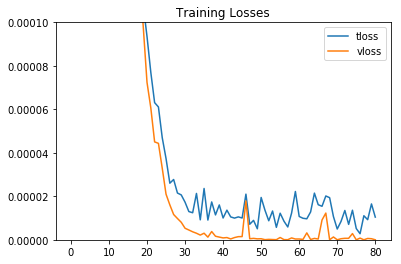

In [5]:
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runlr0005A.npz')

tloss = data11['tloss']
tloss_mean = np.mean(tloss,axis=0)
tloss_std = np.std(tloss,axis=0)/tloss.shape[0]

vloss = data11['vloss']
vloss_mean = np.mean(vloss,axis=0)
vloss_std = np.std(vloss,axis=0)/vloss.shape[0]

figure()
title('Training Losses')
plot(tloss_mean,label='tloss')
plot(vloss_mean,label='vloss')
ylim(0,0.0001)
legend()
# looks like 30-40 is enough, so settle on 40

# Training Trajectory 6 No Noise Learning Rate 0.0005 Stability

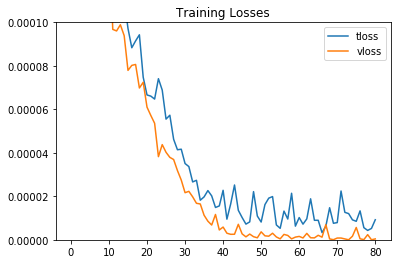

In [6]:
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/stats-runlr0005A.npz')

tloss = data11['tloss']
tloss_mean = np.mean(tloss,axis=0)
tloss_std = np.std(tloss,axis=0)/tloss.shape[0]

vloss = data11['vloss']
vloss_mean = np.mean(vloss,axis=0)
vloss_std = np.std(vloss,axis=0)/vloss.shape[0]

figure()
title('Training Losses')
plot(tloss_mean,label='tloss')
plot(vloss_mean,label='vloss')
ylim(0,0.0001)
legend()
# looks like 50 is enough

# Training Trajectory 6

vloss shape (50, 51)
scores shape (50,)
[ 0.875  0.     0.625  0.     0.125  0.     0.     0.     0.     0.125  1.
  0.     1.     0.875  1.     1.     0.75   0.75   0.5    0.     0.625  0.
  0.     0.     0.25   0.     0.     1.     0.     1.     0.125  0.     0.
  0.     0.     1.     0.     0.875  1.     0.125  0.     0.     1.     0.
  1.     1.     0.     0.     1.     0.875]
 0 | score 0.9 14th | vloss auc 0.00110 17th | selfqval 0.0370 37th
 1 | score 0.0 28th | vloss auc 0.00160 28th | selfqval 0.0007 40th
 2 | score 0.6 18th | vloss auc 0.00148 24th | selfqval 0.6818 19th
 3 | score 0.0 30th | vloss auc 0.00050  1th | selfqval 0.4574 25th
 4 | score 0.1 23th | vloss auc 0.00182 35th | selfqval 0.3188 29th
 5 | score 0.0 31th | vloss auc 0.00064  5th | selfqval 0.8618  7th
 6 | score 0.0 32th | vloss auc 0.00265 47th | selfqval 0.0070 38th
 7 | score 0.0 33th | vloss auc 0.00174 31th | selfqval 0.8534  9th
 8 | score 0.0 34th | vloss auc 0.00176 32th | selfqval 0.0003 41th
 9 |

(-0.1, 1.1)

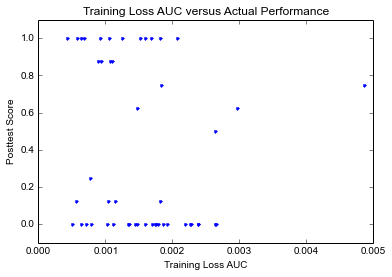

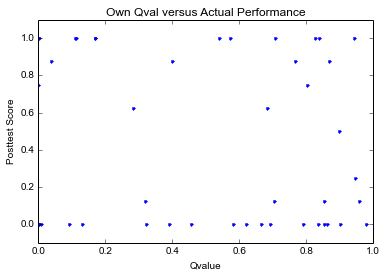

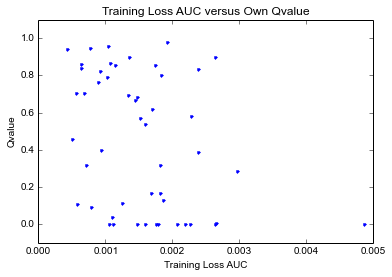

In [2]:
'''
Analyzing results of student2 with 5 skills, with training length 6 and testing length 8.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/stats-runlr01A.npz')
data12 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/stats-runlr01B.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr01A.npz')
data22 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr01B.npz')
data31 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real0-runlr01A.npz')
data32 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real0-runlr01B.npz')


vloss = np.vstack((data11['vloss'],data12['vloss']))
vloss_auc = np.sum(vloss,axis=1)
scores = np.vstack((data21['scores'],data22['scores']))[:,0]
realqvals = np.vstack((data21['qvals'],data22['qvals']))[:,0]
selfqvals = np.vstack((data31['qvals'],data32['qvals']))[:,0]

# ixs sorted by various things
sorted_by_score = np.flipud(np.argsort(scores))
ranked_by_score = ixs2ranks(sorted_by_score)

sorted_by_vloss = np.argsort(vloss_auc)
ranked_by_vloss = ixs2ranks(sorted_by_vloss)

sorted_by_qval = np.flipud(np.argsort(selfqvals))
ranked_by_qval = ixs2ranks(sorted_by_qval)

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

num_models = scores.shape[0]
for i in six.moves.range(num_models):
    six.print_('{:2d} | score {:.1f} {:2d}th | vloss auc {:.5f} {:2d}th | selfqval {:.4f} {:2d}th'.format(
        i,scores[i], ranked_by_score[i], vloss_auc[i], ranked_by_vloss[i], selfqvals[i], ranked_by_qval[i]))

graph_trainauc_score(vloss, scores, postfix=None)
#xlim(0,0.001)
ylim(-0.1,1.1)
graph_qval_score(selfqvals, scores)
#xlim(0.9,1.0)
ylim(-0.1,1.1)
graph_trainauc_qval(vloss,selfqvals)
ylim(-0.1,1.1)

# Training Trajectories Length 7

vloss shape (50, 41)
scores shape (50,)
[ 0.75   1.     1.     1.     1.     1.     1.     1.     1.     0.     1.
  1.     1.     0.75   1.     1.     1.     1.     1.     0.375  0.     1.
  0.125  1.     0.375  1.     0.     1.     1.     1.     1.     0.     0.
  1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
  0.     1.     1.     1.     1.     1.   ]
 0 | score 0.8 39th | vloss auc 0.00083 14th | selfqval 0.9953 12th
 1 | score 1.0 25th | vloss auc 0.00116 22th | selfqval 0.9925 20th
 2 | score 1.0 37th | vloss auc 0.00147 34th | selfqval 0.9876 25th
 3 | score 1.0 30th | vloss auc 0.00139 32th | selfqval 0.8657 43th
 4 | score 1.0  3th | vloss auc 0.00137 31th | selfqval 0.9866 28th
 5 | score 1.0  7th | vloss auc 0.00065  5th | selfqval 0.9954 11th
 6 | score 1.0  1th | vloss auc 0.00116 21th | selfqval 0.9942 17th
 7 | score 1.0  9th | vloss auc 0.00088 15th | selfqval 0.9975  4th
 8 | score 1.0 16th | vloss auc 0.00127 25th | selfqval 0.9718 38th
 9 |

(-0.1, 1.1)

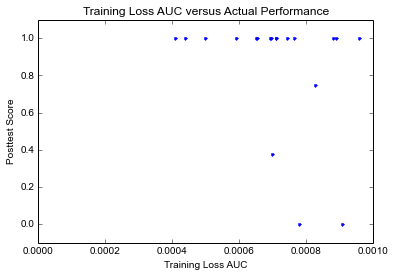

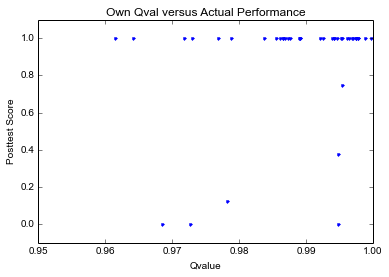

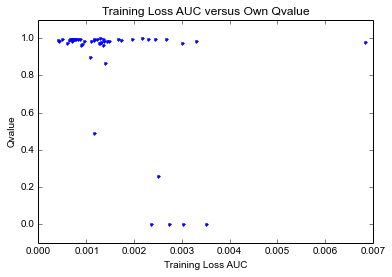

In [18]:
'''
Analyzing results of student2 with 5 skills, with training length 7 and testing length 8.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runlr01A.npz')
data12 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runlr01B.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr01A.npz')
data22 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr01B.npz')
data31 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real0-runlr01A.npz')
data32 = np.load('experiments/test2w5_modelgrusimple_mid-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real0-runlr01B.npz')


vloss = np.vstack((data11['vloss'],data12['vloss']))
vloss_auc = np.sum(vloss,axis=1)
scores = np.vstack((data21['scores'],data22['scores']))[:,0]
realqvals = np.vstack((data21['qvals'],data22['qvals']))[:,0]
selfqvals = np.vstack((data31['qvals'],data32['qvals']))[:,0]

# ixs sorted by various things
sorted_by_score = np.flipud(np.argsort(scores))
ranked_by_score = ixs2ranks(sorted_by_score)

sorted_by_vloss = np.argsort(vloss_auc)
ranked_by_vloss = ixs2ranks(sorted_by_vloss)

sorted_by_qval = np.flipud(np.argsort(selfqvals))
ranked_by_qval = ixs2ranks(sorted_by_qval)

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

num_models = scores.shape[0]
for i in six.moves.range(num_models):
    six.print_('{:2d} | score {:.1f} {:2d}th | vloss auc {:.5f} {:2d}th | selfqval {:.4f} {:2d}th'.format(
        i,scores[i], ranked_by_score[i], vloss_auc[i], ranked_by_vloss[i], selfqvals[i], ranked_by_qval[i]))

graph_trainauc_score(vloss, scores, postfix=None)
xlim(0,0.001)
ylim(-0.1,1.1)
# 0-7 lowest AUC are all good
graph_qval_score(selfqvals, scores)
xlim(0.95,1.0)
ylim(-0.1,1.1)
# 0-11 top qval are all good
# (2,8) (5,11) (6,3) of (qval rank, auc rank) are good
graph_trainauc_qval(vloss,selfqvals)
ylim(-0.1,1.1)
# 39/50 are good

vloss shape (20, 41)
scores shape (20,)
[ 0.     1.     0.     0.     0.     0.     0.     0.     0.     0.     0.375
  0.     1.     0.     0.     0.     0.     1.     0.     0.   ]


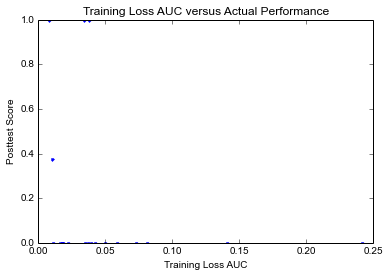

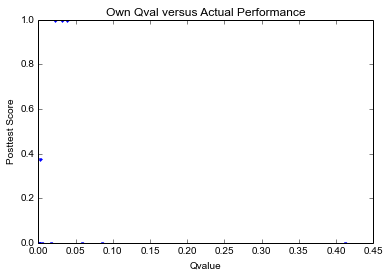

In [4]:
'''
Analyzing results of student2 with 5 skills, with training length 7 and testing length 8.
Single GRU
Dropout 0.8
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-dropout8-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runlr01A.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-dropout8-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr01A.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

graph_trainauc_score(vloss, scores)
graph_qval_score(qvals, scores)

# Small Size Training Length 6

vloss shape (50, 51)
scores shape (50,)
[ 0.625  1.     0.     0.     0.     0.     0.125  0.     1.     0.     1.
  0.     0.     0.     0.     0.     0.     0.     0.     1.     0.5    0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     1.     0.     0.     0.625  0.   ]


(-0.1, 1.1)

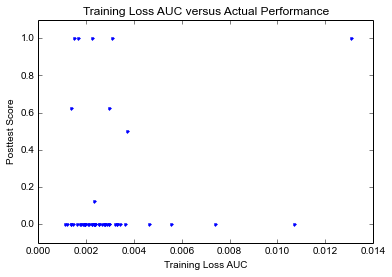

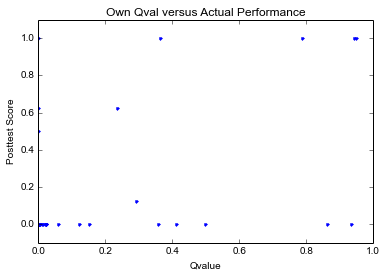

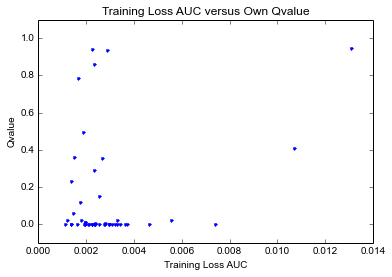

In [8]:
'''
Analyzing results of student2 with 5 skills, with training length 6 and testing length 8.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_small-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/stats-runlr01A.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_small-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr01A.npz')
data31 = np.load('experiments/test2w5_modelgrusimple_small-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real0-runlr01A.npz')


vloss = data11['vloss']
vloss_auc = np.sum(vloss,axis=1)
scores = np.vstack((data21['scores'],))[:,0]
realqvals = np.vstack((data21['qvals'],))[:,0]
selfqvals = np.vstack((data31['qvals'],))[:,0]

# ixs sorted by various things
sorted_by_score = np.flipud(np.argsort(scores))
ranked_by_score = ixs2ranks(sorted_by_score)

sorted_by_vloss = np.argsort(vloss_auc)
ranked_by_vloss = ixs2ranks(sorted_by_vloss)

sorted_by_qval = np.flipud(np.argsort(selfqvals))
ranked_by_qval = ixs2ranks(sorted_by_qval)

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

num_models = scores.shape[0]

# looks like 5/50 are good
graph_trainauc_score(vloss, scores, postfix=None)
#xlim(0,0.001)
ylim(-0.1,1.1)
graph_qval_score(selfqvals, scores)
#xlim(0.9,1.0)for i in six.moves.range(num_models):
ylim(-0.1,1.1)
graph_trainauc_qval(vloss,selfqvals)
ylim(-0.1,1.1)

In [10]:
for i in six.moves.range(num_models):
    ix = sorted_by_qval[i]
    six.print_('{:2d} | score {:.1f} {:2d}th | vloss auc {:.5f} {:2d}th | selfqval {:.4f} {:2d}th'.format(
        ix,scores[ix], ranked_by_score[ix], vloss_auc[ix], ranked_by_vloss[ix], selfqvals[ix], ranked_by_qval[ix]))
# sorting by self-reported qval seems like it may work

 1 | score 1.0  1th | vloss auc 0.01306 49th | selfqval 0.9485  0th
 8 | score 1.0  0th | vloss auc 0.00226 21th | selfqval 0.9433  1th
18 | score 0.0 14th | vloss auc 0.00286 34th | selfqval 0.9342  2th
39 | score 0.0 36th | vloss auc 0.00234 24th | selfqval 0.8614  3th
19 | score 1.0  2th | vloss auc 0.00167  8th | selfqval 0.7877  4th
15 | score 0.0 10th | vloss auc 0.00188 11th | selfqval 0.4969  5th
44 | score 0.0 31th | vloss auc 0.01068 48th | selfqval 0.4100  6th
45 | score 1.0  3th | vloss auc 0.00149  6th | selfqval 0.3622  7th
46 | score 0.0 30th | vloss auc 0.00267 30th | selfqval 0.3561  8th
 6 | score 0.1  8th | vloss auc 0.00233 22th | selfqval 0.2906  9th
48 | score 0.6  6th | vloss auc 0.00138  4th | selfqval 0.2349 10th
22 | score 0.0 11th | vloss auc 0.00253 29th | selfqval 0.1519 11th
35 | score 0.0 40th | vloss auc 0.00176  9th | selfqval 0.1212 12th
 4 | score 0.0 23th | vloss auc 0.00147  5th | selfqval 0.0594 13th
32 | score 0.0 43th | vloss auc 0.00179 10th | s

# Small size Training Length 7

vloss shape (50, 41)
scores shape (50,)
[ 0.    1.    1.    1.    1.    0.    1.    1.    1.    1.    0.75  0.    1.
  1.    1.    0.    1.    1.    0.    0.    1.    0.    0.    1.    0.    0.
  0.    1.    0.    1.    0.    0.    1.    1.    0.5   1.    1.    0.    1.
  1.    0.    0.    1.    1.    1.    1.    1.    1.    0.    1.  ]


(-0.1, 1.1)

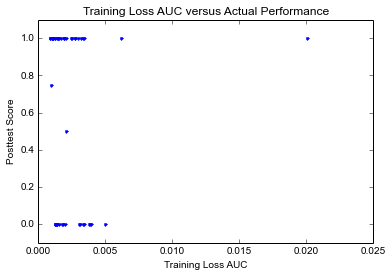

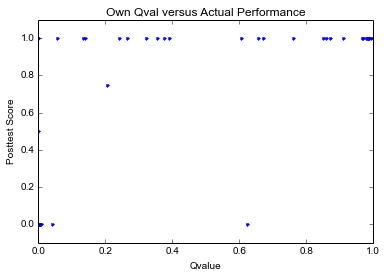

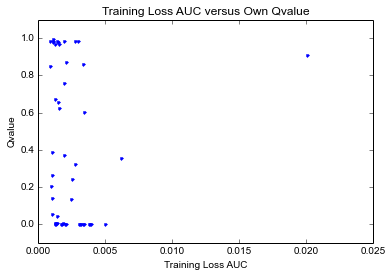

In [4]:
'''
Analyzing results of student2 with 5 skills, with training length 7 and testing length 8.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_small-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runlr01A.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_small-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr01A.npz')
data31 = np.load('experiments/test2w5_modelgrusimple_small-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real0-runlr01A.npz')


vloss = data11['vloss']
vloss_auc = np.sum(vloss,axis=1)
scores = np.vstack((data21['scores'],))[:,0]
realqvals = np.vstack((data21['qvals'],))[:,0]
selfqvals = np.vstack((data31['qvals'],))[:,0]

# ixs sorted by various things
sorted_by_score = np.flipud(np.argsort(scores))
ranked_by_score = ixs2ranks(sorted_by_score)

sorted_by_vloss = np.argsort(vloss_auc)
ranked_by_vloss = ixs2ranks(sorted_by_vloss)

sorted_by_qval = np.flipud(np.argsort(selfqvals))
ranked_by_qval = ixs2ranks(sorted_by_qval)

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

num_models = scores.shape[0]

# looks like 30/50 are good
# 0-11 top vloss look good, except ix2 is slightly stochastic
graph_trainauc_score(vloss, scores, postfix=None)
#xlim(0,0.001)
ylim(-0.1,1.1)
# 0-17 top qvals are good
graph_qval_score(selfqvals, scores)
#xlim(0.9,1.0)
ylim(-0.1,1.1)
graph_trainauc_qval(vloss,selfqvals)
ylim(-0.1,1.1)

In [7]:
for i in six.moves.range(num_models):
    ix = sorted_by_vloss[i]
    six.print_('{:2d} | score {:.1f} {:2d}th | vloss auc {:.5f} {:2d}th | selfqval {:.4f} {:2d}th'.format(
        ix,scores[ix], ranked_by_score[ix], vloss_auc[ix], ranked_by_vloss[ix], selfqvals[ix], ranked_by_qval[ix]))

 6 | score 1.0 11th | vloss auc 0.00086  0th | selfqval 0.8513 14th
13 | score 1.0  3th | vloss auc 0.00088  1th | selfqval 0.9835  6th
10 | score 0.8 30th | vloss auc 0.00097  2th | selfqval 0.2057 26th
27 | score 1.0 10th | vloss auc 0.00101  3th | selfqval 0.3891 20th
35 | score 1.0 23th | vloss auc 0.00104  4th | selfqval 0.2640 24th
36 | score 1.0 29th | vloss auc 0.00104  5th | selfqval 0.0547 29th
 9 | score 1.0  7th | vloss auc 0.00105  6th | selfqval 0.1403 27th
 2 | score 1.0 25th | vloss auc 0.00108  7th | selfqval 0.9854  3th
16 | score 1.0 24th | vloss auc 0.00109  8th | selfqval 0.9775  8th
43 | score 1.0 22th | vloss auc 0.00110  9th | selfqval 0.9940  0th
17 | score 1.0  2th | vloss auc 0.00124 10th | selfqval 0.6717 16th
44 | score 1.0 21th | vloss auc 0.00125 11th | selfqval 0.9665 10th
15 | score 0.0 35th | vloss auc 0.00127 12th | selfqval 0.0004 38th
40 | score 0.0 47th | vloss auc 0.00128 13th | selfqval 0.0039 33th
26 | score 0.0 42th | vloss auc 0.00133 14th | s

# Training Length 7 Noise 0.01 Learning Rate 0.001

vloss shape (50, 3)
scores shape (50,)
[ 1.     0.125  1.     1.     1.     1.     0.     1.     1.     1.     1.
  0.     0.375  1.     1.     0.     1.     1.     1.     1.     1.     1.
  1.     1.     0.     1.     1.     1.     1.     1.     1.     1.     1.
  1.     1.     0.625  1.     1.     0.375  1.     1.     0.     0.875  1.
  1.     1.     1.     1.     1.     1.   ]


(-0.1, 1.1)

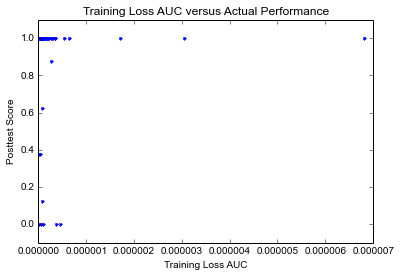

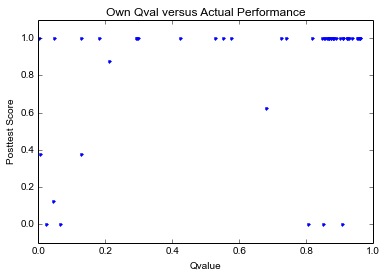

In [4]:
'''
Analyzing results of student2 with 5 skills, with training length 7 and testing length 8.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.01-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/stats-runlr001A.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.01-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr001A.npz')
data31 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.01-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real0-runlr001A.npz')
#data41 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.01-dropout10-shuffle1-data-test2a-w5-n100000-l7-random.pickle/msloss-runlr01A.npz')

vloss = data11['vloss'][:,-3:]
vloss_auc = np.sum(vloss,axis=1)
tloss = data11['tloss'][:,-3:]
tloss_auc = np.sum(tloss,axis=1)
scores = np.vstack((data21['scores'],))[:,0]
realqvals = np.vstack((data21['qvals'],))[:,0]
selfqvals = np.vstack((data31['qvals'],))[:,0]
#msloss = data41['msloss'][:,0,:]

# ixs sorted by various things
sorted_by_score = np.flipud(np.argsort(scores))
ranked_by_score = ixs2ranks(sorted_by_score)

sorted_by_vloss = np.argsort(vloss_auc)
ranked_by_vloss = ixs2ranks(sorted_by_vloss)

sorted_by_tloss = np.argsort(tloss_auc)
ranked_by_tloss = ixs2ranks(sorted_by_tloss)

sorted_by_qval = np.flipud(np.argsort(selfqvals))
ranked_by_qval = ixs2ranks(sorted_by_qval)

#sorted_by_msloss = (np.argsort(msloss[:,0]))
#ranked_by_msloss = ixs2ranks(sorted_by_msloss)

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
#six.print_('msloss shape {}'.format(msloss.shape))
six.print_(scores)

num_models = scores.shape[0]

# 40/50 are good models + 1 almost good
graph_trainauc_score(vloss, scores, postfix=None)
#xlim(0,0.002)
ylim(-0.1,1.1)
graph_qval_score(selfqvals, scores)
#xlim(0.95,1.0)
ylim(-0.1,1.1)
#graph_trainauc_qval(vloss,selfqvals)
#ylim(-0.1,1.1)
#graph_msloss_score(msloss, scores, postfix=None)
#xlim(0,0.00002)
#ylim(-0.1,1.1)
#figure()
#plot(ranked_by_tloss,ranked_by_msloss,'.')


In [6]:
for i in six.moves.range(num_models):
    ix = sorted_by_qval[i]
    #six.print_('{:2d} | score {:.1f} {:2d}th | vloss auc {:.5f} {:2d}th | vloss auc {:.5f} {:2d}th | msloss {:.8f} {:2d}th | selfqval {:.4f} {:2d}th'.format(
    #    ix,scores[ix], ranked_by_score[ix], tloss_auc[ix], ranked_by_tloss[ix], vloss_auc[ix], ranked_by_vloss[ix], msloss[ix,0], ranked_by_msloss[ix], selfqvals[ix], ranked_by_qval[ix]))
    six.print_('{:2d} | score {:.1f} {:2d}th | vloss auc {:.5f} {:2d}th | vloss auc {:.5f} {:2d}th | selfqval {:.4f} {:2d}th'.format(
        ix,scores[ix], ranked_by_score[ix], tloss_auc[ix], ranked_by_tloss[ix], vloss_auc[ix], ranked_by_vloss[ix], selfqvals[ix], ranked_by_qval[ix]))

46 | score 1.0 26th | vloss auc 0.00004 30th | vloss auc 0.00000 39th | selfqval 0.9603  0th
36 | score 1.0 33th | vloss auc 0.00007 36th | vloss auc 0.00000 46th | selfqval 0.9594  1th
22 | score 1.0  4th | vloss auc 0.00003 21th | vloss auc 0.00000 45th | selfqval 0.9573  2th
32 | score 1.0 38th | vloss auc 0.00007 37th | vloss auc 0.00000  1th | selfqval 0.9558  3th
48 | score 1.0  2th | vloss auc 0.00009 43th | vloss auc 0.00000 17th | selfqval 0.9514  4th
33 | score 1.0 34th | vloss auc 0.00000  0th | vloss auc 0.00000 18th | selfqval 0.9373  5th
 9 | score 1.0 14th | vloss auc 0.00001  9th | vloss auc 0.00000 34th | selfqval 0.9293  6th
16 | score 1.0 10th | vloss auc 0.00001  8th | vloss auc 0.00000 11th | selfqval 0.9258  7th
28 | score 1.0 31th | vloss auc 0.00009 42th | vloss auc 0.00000 42th | selfqval 0.9229  8th
43 | score 1.0 29th | vloss auc 0.00002 11th | vloss auc 0.00000 27th | selfqval 0.9218  9th
23 | score 1.0  3th | vloss auc 0.00013 48th | vloss auc 0.00000 13th 

# Training Length 6 Noise 0.01 Learning Rate 0.001

vloss shape (50, 3)
scores shape (50,)
[ 0.     0.     0.     0.     1.     1.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.125  0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.125  0.     0.     0.     0.25   0.     0.
  0.     0.     0.     0.     0.     0.   ]


(-0.1, 1.1)

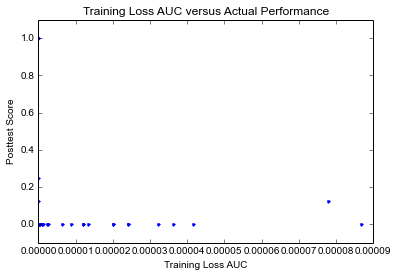

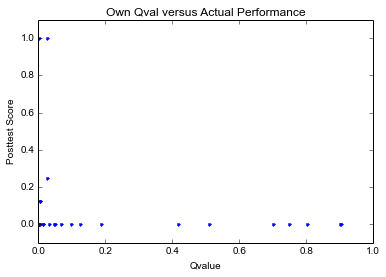

In [8]:
'''
Analyzing results of student2 with 5 skills, with training length 6 and testing length 8.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.01-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/stats-runlr001A.npz')
data21 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.01-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real1-runlr001A.npz')
data31 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.01-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/mcts-rtype2-rollouts20000-trajectories8-real0-runlr001A.npz')
#data41 = np.load('experiments/test2w5_modelgrusimple_mid-noise0.01-dropout10-shuffle1-data-test2a-w5-n100000-l6-random.pickle/msloss-runlr01A.npz')

vloss = data11['vloss'][:,-3:]
vloss_auc = np.sum(vloss,axis=1)
tloss = data11['tloss'][:,-3:]
tloss_auc = np.sum(tloss,axis=1)
scores = np.vstack((data21['scores'],))[:,0]
realqvals = np.vstack((data21['qvals'],))[:,0]
selfqvals = np.vstack((data31['qvals'],))[:,0]
#msloss = data41['msloss'][:,0,:]

# ixs sorted by various things
sorted_by_score = np.flipud(np.argsort(scores))
ranked_by_score = ixs2ranks(sorted_by_score)

sorted_by_vloss = np.argsort(vloss_auc)
ranked_by_vloss = ixs2ranks(sorted_by_vloss)

sorted_by_tloss = np.argsort(tloss_auc)
ranked_by_tloss = ixs2ranks(sorted_by_tloss)

sorted_by_qval = np.flipud(np.argsort(selfqvals))
ranked_by_qval = ixs2ranks(sorted_by_qval)

#sorted_by_msloss = (np.argsort(msloss[:,0]))
#ranked_by_msloss = ixs2ranks(sorted_by_msloss)

six.print_('vloss shape {}'.format(vloss.shape))
six.print_('scores shape {}'.format(scores.shape))
#six.print_('msloss shape {}'.format(msloss.shape))
six.print_(scores)

num_models = scores.shape[0]

# 2/50 are good
graph_trainauc_score(vloss, scores, postfix=None)
#xlim(0,0.002)
ylim(-0.1,1.1)
graph_qval_score(selfqvals, scores)
#xlim(0.95,1.0)
ylim(-0.1,1.1)
#graph_trainauc_qval(vloss,selfqvals)
#ylim(-0.1,1.1)
#graph_msloss_score(msloss, scores, postfix=None)
#xlim(0,0.00002)
#ylim(-0.1,1.1)
#figure()
#plot(ranked_by_tloss,ranked_by_msloss,'.')
